[reference_ucsb](https://www.deepspace.ucsb.edu/wp-content/uploads/2012/02/134-Notes-a.pdf)

[reference_my](https://github.com/xn6o6x/Astronomy/blob/master/SNR.pdf)

# Example 1

$seeing=2"$

$N_R=12$

$i_{DC}=1\ e^{-1}\ \mathrm{s}^{-1}\mathrm{pixel}^{-1}$

$Q_e=0.3$

$A=10^3\ \mathrm{cm}^{2}$

$\epsilon=0.5$

$F_\beta=10^{-2}\ \mathrm{photons}^{1}\mathrm{s}^{-1}\mathrm{cm}^{-2}\mathrm{arcsec}^{-2}$

$\Omega=4\ \mathrm{arcsec}^{2}$

$F=0.03\ \mathrm{photons}^{1}\mathrm{s}^{-1}\mathrm{cm}^{-2}$ ($m = 20$)

we have

$
A_\epsilon=A\epsilon=5\times10^2\mathrm{cm}^{2}
$

$
N_T=FA_\epsilon+i_{DC}+F_\beta\Omega A_\epsilon
$

$
S_N \equiv \dfrac S N = \dfrac{F\tau A_\epsilon}{\sqrt{N_R^2+\tau N_T}}\sim\sqrt{\tau}
$

In [1]:
from astropy import units as u
import matplotlib.pyplot as plt

plt.style.use("classic")
%load_ext lab_black
%config InlineBackend.figure_format = 'retina'

In [2]:
NR = 12
F = 0.03
A = 0.5 * 1000 * 0.3
i = 1
omega = 4
NT = lambda Fb: F * A + i + Fb * omega * A

In [3]:
SNR = lambda t, Fb: F * A * t ** 0.5 / (NR ** 2 / t + NT(Fb)) ** 0.5

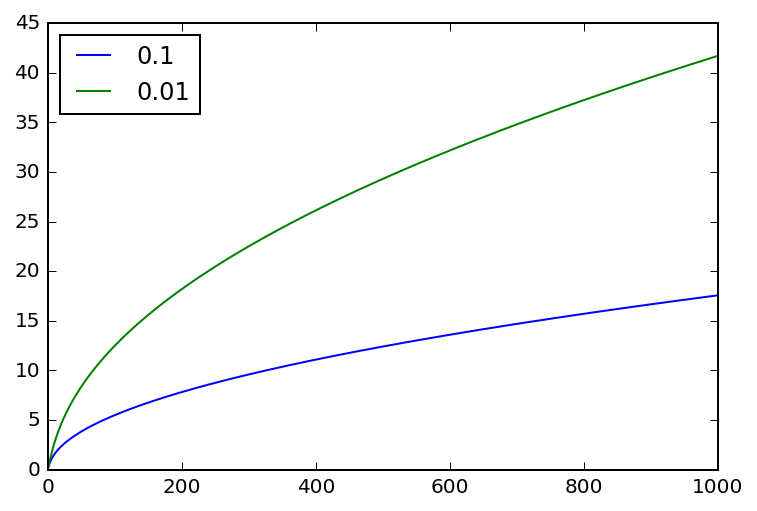

In [4]:
plt.plot(range(1, 1000), [SNR(i, 0.1) for i in range(1, 1000)], label="0.1")
plt.plot(range(1, 1000), [SNR(i, 0.01) for i in range(1, 1000)], label="0.01")
plt.legend(loc=2)
plt.show()

---
# Example 2

we ignore $i_{DC}$、$N_R$

$
SN = 10
$

$
m_g = 16\sim28
$

$
seeing\ disc = 3, 1, 0.5, 0.1\ \mathrm{arcsec}
$

$
sky\ background\ brightness = 19\mathrm{mag}, 21\mathrm{mag}, 23\mathrm{mag}\ \mathrm{arcsec}^{-2}
$

$
D = 1, 4, 10\ \mathrm{m}
$

$
Q_e = 0.5
$

In [5]:
SN = 10
m = 16
seeing = 3 * u.arcsec
bg = 19
D = 1 * u.m
Qe = 0.5

$A_\epsilon=A\epsilon Q_e=\pi R^2\epsilon Q_e$

In [6]:
A = (np.pi * (D / 2) ** 2 * Qe).to(u.cm ** 2)
A

<Quantity 3926.99081699 cm2>

$
F = f_\nu\times\Delta\nu
$

for SDSS **g magnitude**:

$
\lambda = 4750\mathrm{A} \qquad \mathrm{FWHM}=1379\mathrm{A}
$

$
\Delta\nu=1.87\times10^{14}\ \mathrm{Hz}
$


In [7]:
l = 4750
FWHM = 1379
a, b = ([l - FWHM / 2, l + FWHM / 2] * u.AA).to(u.Hz, equivalencies=u.spectral())
dnu = a - b
dnu

<Quantity 1.8717441e+14 Hz>

In [8]:
def AB_to_cgs(m, wavelength):
    f = (m).to(u.Jy)
    unit = u.photon / u.s / u.Hz / u.cm ** 2
    f = (f).to(unit, equivalencies=u.spectral_density(wavelength))
    return f

In [9]:
f = AB_to_cgs(m * u.ABmag, 4750 * u.AA)
F = f * dnu
F

<Quantity 0.64693904 ph / (cm2 s)>

In [10]:
fbo = AB_to_cgs(bg * u.ABmag, 4750 * u.AA) / u.arcsec ** 2 * seeing ** 2
Fbo = fbo * dnu
Fbo

<Quantity 0.36737184 ph / (cm2 s)>

$
N_T=FA_\epsilon+F_\beta\Omega A_\epsilon
$

$
\tau = \dfrac{S_{N}^{2}N_T}{F^{2} A_{\epsilon}^{2}}
$

In [11]:
NT = F * A + 2 * Fbo * A
t = SN ** 2 * NT / (F ** 2 * A ** 2)
t * u.photon

<Quantity 0.08406626 s>

## Plot

In [12]:
def time(SN=10, m=16, seeing=3 * u.arcsec, bg=19, D=1 * u.m):
    Qe = 0.5
    A = (np.pi * (D / 2) ** 2 * Qe).to(u.cm ** 2)
    l = 4750
    FWHM = 1379
    a, b = ([l - FWHM / 2, l + FWHM / 2] * u.AA).to(u.Hz, equivalencies=u.spectral())
    dnu = a - b
    f = AB_to_cgs(m * u.ABmag, 4750 * u.AA)
    F = f * dnu
    fbo = AB_to_cgs(bg * u.ABmag, 4750 * u.AA) / u.arcsec ** 2 * seeing ** 2
    Fbo = fbo * dnu
    NT = F * A + 2 * Fbo * A
    t = SN ** 2 * NT / (F ** 2 * A ** 2)
    return t.value

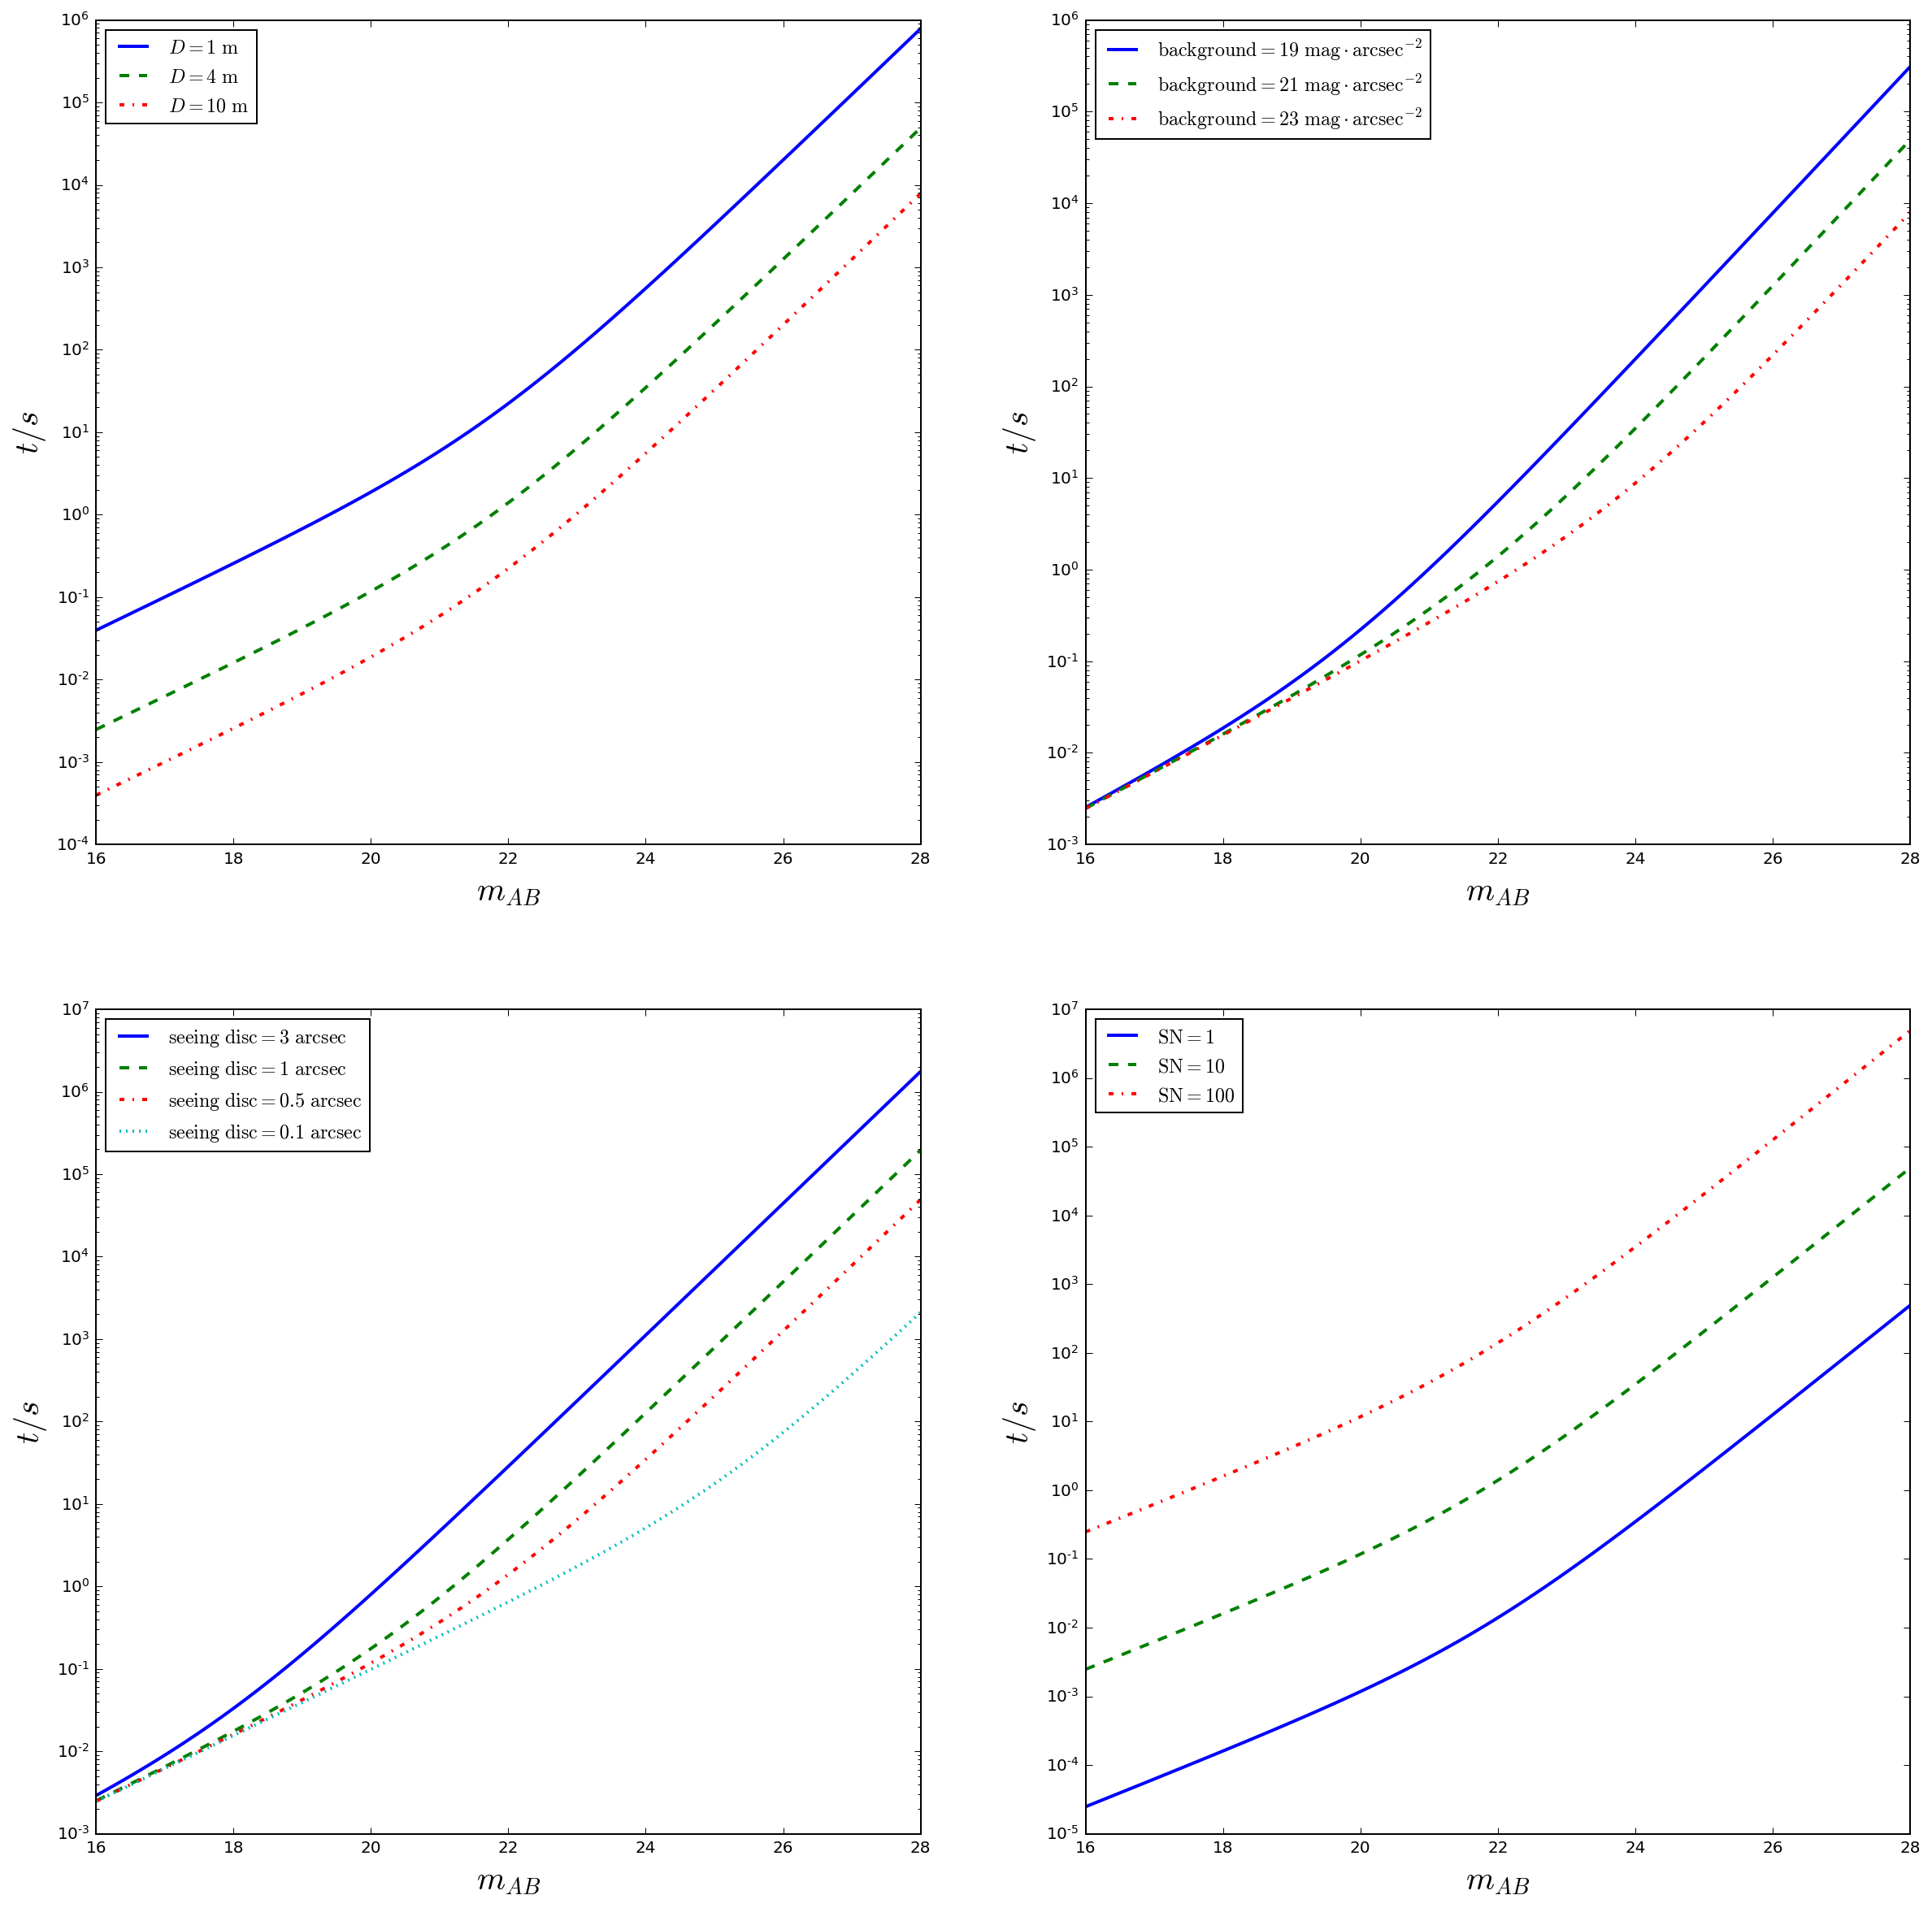

In [13]:
style = ["-", "--", "-.", ":"]
plt.figure(figsize=(20, 20))
plt.subplot(221)
x = np.linspace(16, 28, 100)
par = [1, 4, 10]
func = lambda par: [
    time(SN=10, m=x, seeing=0.5 * u.arcsec, bg=21, D=i * u.m) for i in par
]
label = lambda D: "$D=%s\ \mathrm{m}$" % D
for i, y in enumerate(func(par)):
    plt.semilogy(x, y, style[i], lw=2, label=label(par[i]))
plt.xlabel("$m_{AB}$", fontsize=20)
plt.ylabel("$t/s$", fontsize=20)
plt.legend(loc=2)
plt.subplot(222)
par = [19, 21, 23]
func = lambda par: [
    time(SN=10, m=x, seeing=0.5 * u.arcsec, bg=i, D=4 * u.m) for i in par
]
label = (
    lambda bg: "$\mathrm{background}=%s\ \mathrm{mag}\cdot\mathrm{arcsec}^{-2}$" % bg
)
for i, y in enumerate(func(par)):
    plt.semilogy(x, y, style[i], lw=2, label=label(par[i]))
plt.xlabel("$m_{AB}$", fontsize=20)
plt.ylabel("$t/s$", fontsize=20)
plt.legend(loc=2)
plt.subplot(223)
par = [3, 1, 0.5, 0.1]
func = lambda par: [
    time(SN=10, m=x, seeing=i * u.arcsec, bg=21, D=4 * u.m) for i in par
]
label = lambda seeing: "$\mathrm{seeing\ disc}=%s\ \mathrm{arcsec}$" % seeing
for i, y in enumerate(func(par)):
    plt.semilogy(x, y, style[i], lw=2, label=label(par[i]))
plt.xlabel("$m_{AB}$", fontsize=20)
plt.ylabel("$t/s$", fontsize=20)
plt.legend(loc=2)
plt.subplot(224)
par = [1, 10, 100]
func = lambda par: [
    time(SN=i, m=x, seeing=0.5 * u.arcsec, bg=21, D=4 * u.m) for i in par
]
label = lambda SN: "$\mathrm{SN}=%s$" % SN
for i, y in enumerate(func(par)):
    plt.semilogy(x, y, style[i], lw=2, label=label(par[i]))
plt.xlabel("$m_{AB}$", fontsize=20)
plt.ylabel("$t/s$", fontsize=20)
plt.legend(loc=2)
plt.savefig("time.png", dpi=300)
plt.show()

## limiting magnitude
$$
F = \frac{S_N^2+S_N\sqrt{S_N^2+8\tau A_{\epsilon}F_\beta\Omega}}{2\tau A_\epsilon}
$$

In [14]:
def limit(t=3600 * u.s, D=4 * u.m, seeing=0.5 * u.arcsec, bg=21):
    SN = 10
    Qe = 0.5
    A = (np.pi * (D / 2) ** 2 * Qe).to(u.cm ** 2)
    l = 4750
    FWHM = 1379
    a, b = ([l - FWHM / 2, l + FWHM / 2] * u.AA).to(u.Hz, equivalencies=u.spectral())
    dnu = a - b
    f = AB_to_cgs(m * u.ABmag, 4750 * u.AA)
    F = f * dnu
    fbo = AB_to_cgs(bg * u.ABmag, 4750 * u.AA) / u.arcsec ** 2 * seeing ** 2
    Fbo = fbo * dnu
    F = (
        (SN ** 2 + SN * np.sqrt(SN ** 2 + (8 * t * A * Fbo).value))
        / (2 * t * A)
        * u.photon
    )
    return ((F / dnu).to(u.Jy, equivalencies=u.spectral_density(l * u.AA))).to(u.ABmag)

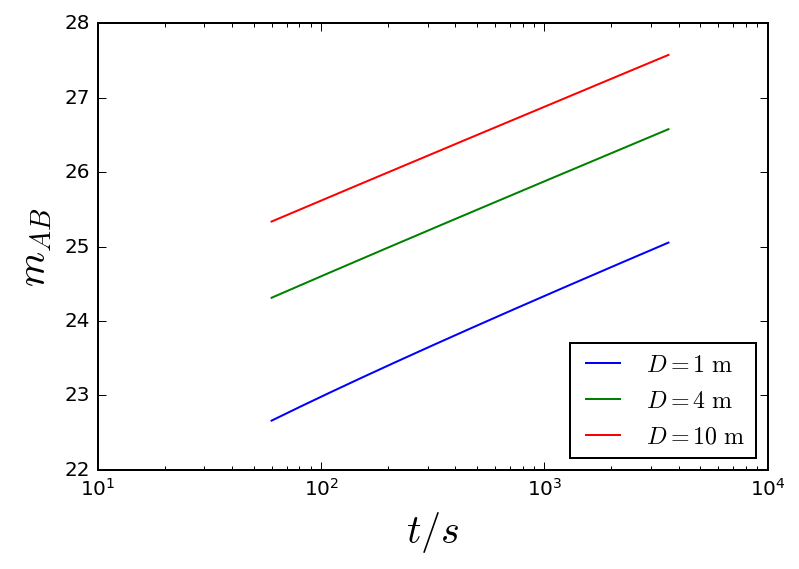

In [15]:
t = np.linspace(60, 3600, 1000)
par = [1, 4, 10]
func = lambda par: [
    limit(t=t * u.s, seeing=0.5 * u.arcsec, bg=21, D=i * u.m) for i in par
]
label = lambda D: "$D=%s\ \mathrm{m}$" % D
for i, y in enumerate(func(par)):
    plt.semilogx(t, y, label=label(par[i]))
plt.xlabel("$t/s$", fontsize=20)
plt.ylabel("$m_{AB}$", fontsize=20)
plt.legend(loc=4)
plt.savefig("m_D.png", dpi=300)
plt.show()

In [16]:
for i in [1, 4, 10]:
    print(
        "D=%s\tm=%s"
        % (i, limit(t=3600 * u.s, D=i * u.m, seeing=0.5 * u.arcsec, bg=21).value)
    )

D=1	m=25.052435860147856
D=4	m=26.576623157428564
D=10	m=27.57528106434538


In [17]:
for i in [3, 1, 0.5, 0.1]:
    print(
        "Seeing=%s\tm=%s"
        % (i, limit(t=3600 * u.s, D=4 * u.m, seeing=i * u.arcsec, bg=21).value)
    )

Seeing=3	m=24.63653377197455
Seeing=1	m=25.82722140253249
Seeing=0.5	m=26.576623157428564
Seeing=0.1	m=28.298666521014496


In [18]:
for i in [19, 21, 23]:
    print(
        "Background=%s\tm=%s"
        % (i, limit(t=3600 * u.s, D=4 * u.m, seeing=0.5 * u.arcsec, bg=i).value)
    )

Background=19	m=25.580443055534833
Background=21	m=26.576623157428564
Background=23	m=27.567028458762877
